# Imports

In [29]:
from sklearn.linear_model import LogisticRegression
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [30]:
DATASET = "com2sense"
WEIGHT = "fantasy_reasoning"
MODEL_NAME = "gemma-2-2b-it"
DATA_DIR = f"./experimental_data/{MODEL_NAME}/{DATASET}/"
WEIGHTS_DIR = f"./weights/linear_analysis/{MODEL_NAME}/{WEIGHT}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data

In [31]:
acts_exp_resid = torch.load(DATA_DIR + "acts_exp_resid.pt", map_location=device)
acts_resid = torch.load(DATA_DIR + "acts_resid.pt", map_location=device)

C:\Users\wsr20\AppData\Local\Temp\ipykernel_20384\96380757.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts_exp_resid = torch.load(DATA_DIR + "acts_exp_resid.pt", ma

In [32]:
X_exp_resid = acts_exp_resid
X_resid = acts_resid
y_exp_resid = torch.ones(X_exp_resid.shape[0])
y_resid = torch.zeros(X_resid.shape[0])
X = torch.cat((X_exp_resid, X_resid), dim=0)
y = torch.cat((y_exp_resid, y_resid), dim=0)

# Load Classifiers

In [33]:
classifiers = [LogisticRegression(fit_intercept=False)] * acts_exp_resid.shape[1]
for layer in range(acts_exp_resid.shape[1]):
    weights = torch.load(WEIGHTS_DIR + f"layer_{layer}.pt", map_location=device).numpy()
    classifiers[layer].coef_ = weights
    classifiers[layer].intercept_ = 0
    classifiers[layer].classes_ = np.array([0, 1])

C:\Users\wsr20\AppData\Local\Temp\ipykernel_20384\1761057080.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(WEIGHTS_DIR + f"layer_{layer}.pt", map_

# Perform Evaluation

In [34]:
accuracies = []
for i, classifier in enumerate(classifiers):
    y_pred = classifier.predict(X[:, i, :])
    print(f"layer {i}")
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)
    
    conf_matrix = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    class_report = classification_report(y, y_pred)
    print("Classification Report:\n", class_report)
    
    print("\n")

layer 0
Accuracy: 0.5013340448239061
Confusion Matrix:
 [[   5 1869]
 [   0 1874]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.00      0.01      1874
         1.0       0.50      1.00      0.67      1874

    accuracy                           0.50      3748
   macro avg       0.75      0.50      0.34      3748
weighted avg       0.75      0.50      0.34      3748



layer 1
Accuracy: 0.5008004268943437
Confusion Matrix:
 [[   3 1871]
 [   0 1874]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      1874
         1.0       0.50      1.00      0.67      1874

    accuracy                           0.50      3748
   macro avg       0.75      0.50      0.34      3748
weighted avg       0.75      0.50      0.34      3748



layer 2
Accuracy: 0.5005336179295624
Confusion Matrix:
 [[   2 1872]
 [   0 1874]]
Classification Report:
               precisi

c:\Users\wsr20\anaconda3\envs\CoT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wsr20\anaconda3\envs\CoT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wsr20\anaconda3\envs\CoT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wsr2

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1874
         1.0       0.50      1.00      0.67      1874

    accuracy                           0.50      3748
   macro avg       0.25      0.50      0.33      3748
weighted avg       0.25      0.50      0.33      3748



layer 4
Accuracy: 0.5
Confusion Matrix:
 [[   0 1874]
 [   0 1874]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1874
         1.0       0.50      1.00      0.67      1874

    accuracy                           0.50      3748
   macro avg       0.25      0.50      0.33      3748
weighted avg       0.25      0.50      0.33      3748



layer 5
Accuracy: 0.5
Confusion Matrix:
 [[   0 1874]
 [   0 1874]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1874
         1.0       0.50  

# Plot accuracy

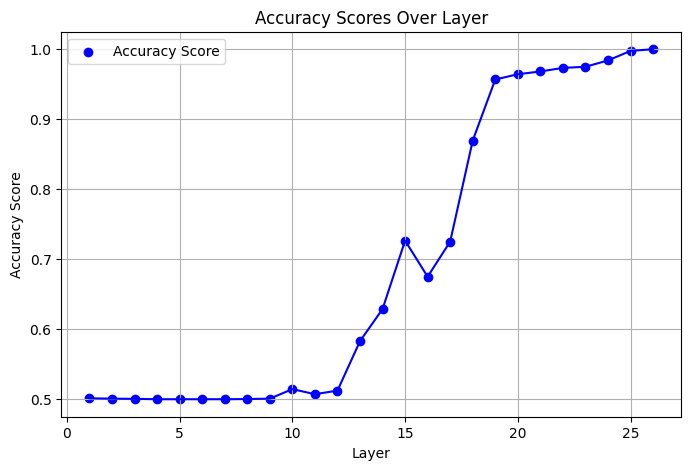

In [35]:
x_values = range(1, len(accuracies) + 1)
plt.figure(figsize=(8, 5))
plt.scatter(x_values, accuracies, color="blue", label="Accuracy Score")
plt.plot(x_values, accuracies, color="blue")

# Adding titles and labels
plt.title("Accuracy Scores Over Layer")
plt.xlabel("Layer")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.legend()
plt.savefig(f"./figs/{MODEL_NAME}/{WEIGHT}/{DATASET}_accuracy.png")
plt.show()